In [126]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as st
import numpy as np
#from scipy.stats import linregress
from sklearn import datasets
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt

In [127]:
# Read CSV
cases_data = pd.read_csv('covid19cases_test.csv')
vaccine_data= pd.read_csv('covid19vaccinesbycounty.csv')


In [128]:
# Import California counties
ca_counties_cases_csv = "covid19cases_test.csv" 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2/1/2020,Alameda,County,1685886.0,3.0,0.0,4.0,0.0,0.0,0.0,NaN
22814,2/9/2021,Alameda,County,1685886.0,267.0,9.0,14435.0,389.0,283.0,12.0,7612.0
4819,4/20/2020,Alameda,County,1685886.0,51.0,2.0,746.0,54.0,47.0,1.0,NaN
3843,4/4/2020,Alameda,County,1685886.0,36.0,1.0,269.0,26.0,73.0,1.0,NaN
23790,2/25/2021,Alameda,County,1685886.0,123.0,6.0,10818.0,172.0,111.0,11.0,9250.0
...,...,...,...,...,...,...,...,...,...,...,...
14700,9/28/2020,Yuba,County,79290.0,10.0,0.0,195.0,10.0,3.0,0.0,124.0
8844,6/24/2020,Yuba,County,79290.0,3.0,0.0,117.0,2.0,2.0,0.0,121.0
18787,12/4/2020,Yuba,County,79290.0,68.0,0.0,380.0,76.0,43.0,0.0,263.0
914,2/15/2020,Yuba,County,79290.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [129]:
ca_counties_vaccine_csv = "covid19vaccinesbycounty.csv"
ca_counties_vaccine_df = pd.read_csv(ca_counties_vaccine_csv, encoding="utf-8")
ca_counties_vaccine_df.sort_values(by = 'county', ascending = True)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
654,Alameda,4/26/2021,7800,1419774,5459,838194,2331,497177,10,84403,4872,320176,2910,590911,4889,911087,California
557,Alameda,1/19/2021,5521,82182,3329,49891,2192,32291,0,0,4334,55177,1185,13496,4336,68673,California
558,Alameda,1/20/2021,6691,88873,4026,53917,2665,34956,0,0,5398,59298,1281,14777,5402,74075,California
559,Alameda,1/21/2021,7741,96614,3382,57299,4359,39315,0,0,6913,65392,822,15599,6916,80991,California
560,Alameda,1/22/2021,6838,103452,2032,59331,4806,44121,0,0,5700,69963,1131,16730,5702,86693,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7851,Yuba,1/22/2021,103,2534,6,1195,97,1339,0,0,94,1859,9,338,94,2197,California
7850,Yuba,1/21/2021,210,2431,95,1189,115,1242,0,0,202,1774,8,329,202,2103,California
7849,Yuba,1/20/2021,132,2221,87,1094,45,1127,0,0,109,1580,23,321,109,1901,California
7847,Yuba,1/18/2021,60,2009,32,978,28,1031,0,0,35,1444,25,283,35,1727,California


In [130]:
county1 = input("What county? ")

What county? Orange


In [142]:
ca_counties_cases_df = ca_counties_cases_df.loc[ca_counties_cases_df["area"]== county1]
ca_counties_cases_df.sort_values(by = 'date', ascending = False)


,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
13511,9/9/2020,Orange,County,3228519.0,140.0,2.0,9987.0,218.0,180.0,10.0,2871.0
13450,9/8/2020,Orange,County,3228519.0,170.0,5.0,9230.0,293.0,82.0,2.0,3680.0
13389,9/7/2020,Orange,County,3228519.0,111.0,2.0,2249.0,84.0,201.0,0.0,5970.0
13328,9/6/2020,Orange,County,3228519.0,103.0,9.0,2440.0,90.0,205.0,3.0,6992.0
13267,9/5/2020,Orange,County,3228519.0,123.0,9.0,2910.0,143.0,238.0,8.0,8054.0
...,...,...,...,...,...,...,...,...,...,...,...
21197,1/13/2021,Orange,County,3228519.0,2386.0,50.0,26676.0,3243.0,2898.0,30.0,18283.0
21136,1/12/2021,Orange,County,3228519.0,2648.0,48.0,31588.0,3999.0,1920.0,29.0,22915.0
21075,1/11/2021,Orange,County,3228519.0,2745.0,56.0,30722.0,3723.0,2574.0,9.0,22138.0
21014,1/10/2021,Orange,County,3228519.0,1476.0,57.0,7996.0,1353.0,2762.0,70.0,24031.0


In [143]:
ca_counties_vaccine_df = ca_counties_vaccine_df.loc[ca_counties_vaccine_df["county"]==county1]
ca_counties_vaccine_df.sort_values(by = 'administered_date', ascending = False)

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
4305,Orange,4/9/2021,40218,1877823,23473,982194,11714,837996,5031,57633,17845,539683,22289,696538,22862,1236221,California
4304,Orange,4/8/2021,38214,1837605,21281,958721,11611,826282,5322,52602,18711,539110,19415,674249,24013,1213359,California
4303,Orange,4/7/2021,35612,1799391,19948,937440,11235,814671,4429,47280,15745,534512,19797,654834,20156,1189346,California
4302,Orange,4/6/2021,33018,1763779,15495,917492,14218,803436,3305,42851,14334,534153,18603,635037,17629,1169190,California
4301,Orange,4/5/2021,29250,1730761,13875,901997,12151,789218,3224,39546,13787,535127,15408,616434,17005,1151561,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,Orange,1/13/2021,10224,111824,4899,72435,5325,39389,0,0,7026,68818,3194,21493,7033,90311,California
4218,Orange,1/12/2021,8803,101600,4718,67536,4085,34064,0,0,5339,64979,3462,18299,5340,83278,California
4217,Orange,1/11/2021,9429,92797,4895,62818,4534,29979,0,0,5812,63101,3620,14837,5813,77938,California
4216,Orange,1/10/2021,4231,83368,1041,57923,3190,25445,0,0,3351,60908,879,11217,3355,72125,California


In [144]:
## ca_counties_cases_df['area']


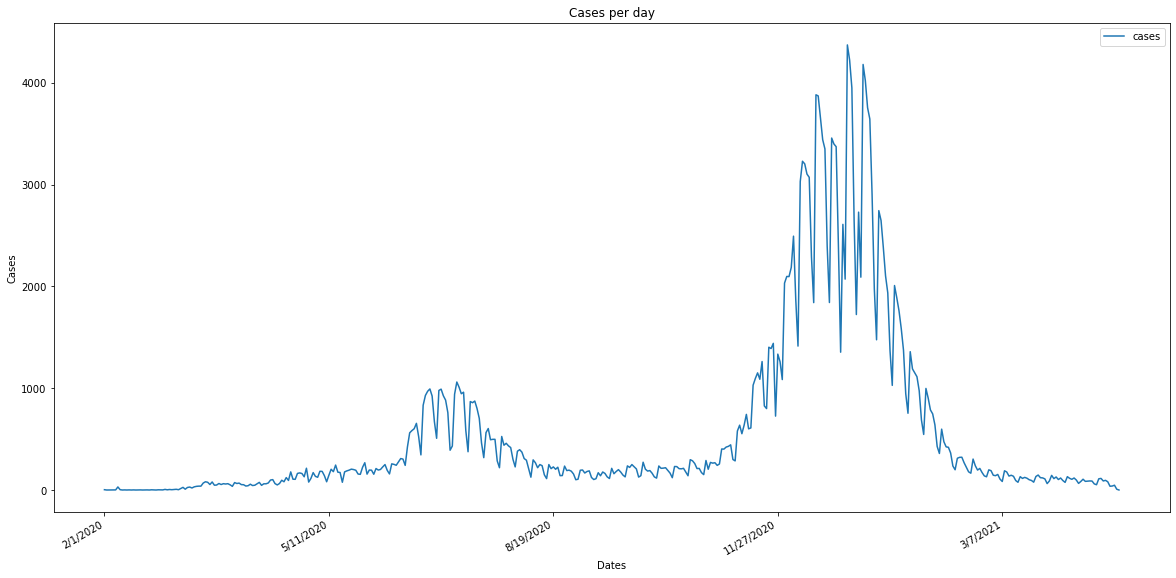

In [156]:
cases_plot = ca_counties_cases_df.plot('date', 'cases',kind="line", figsize=(20,10))
plt.title("Cases per day")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.gcf().autofmt_xdate()
plt.show()



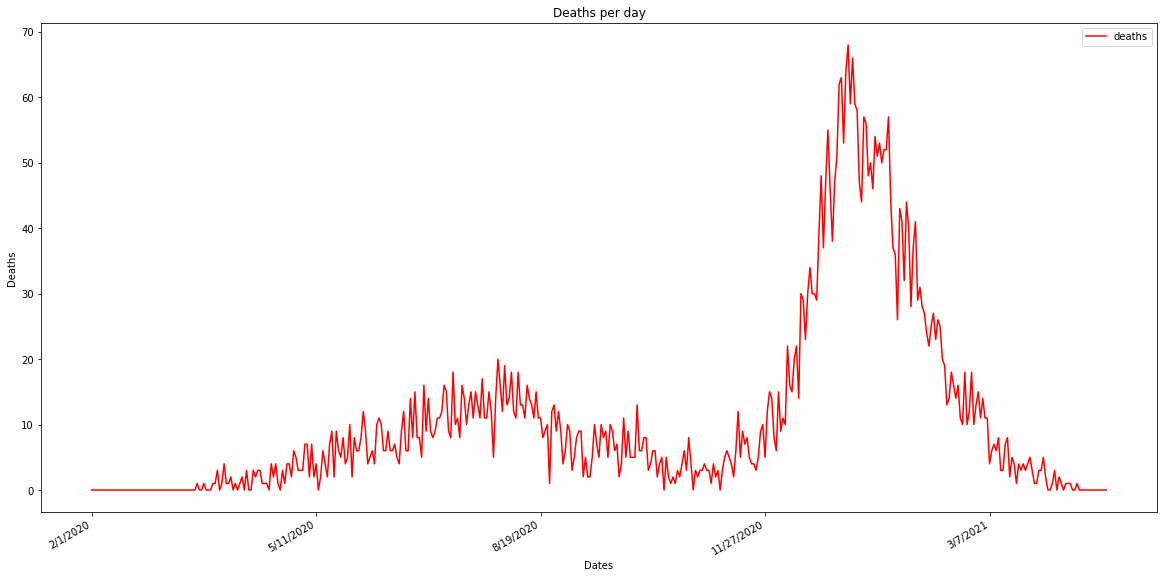

In [155]:
deaths_plot = ca_counties_cases_df.plot('date', 'deaths',kind="line", color="red", figsize=(20,10))
plt.title("Deaths per day")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

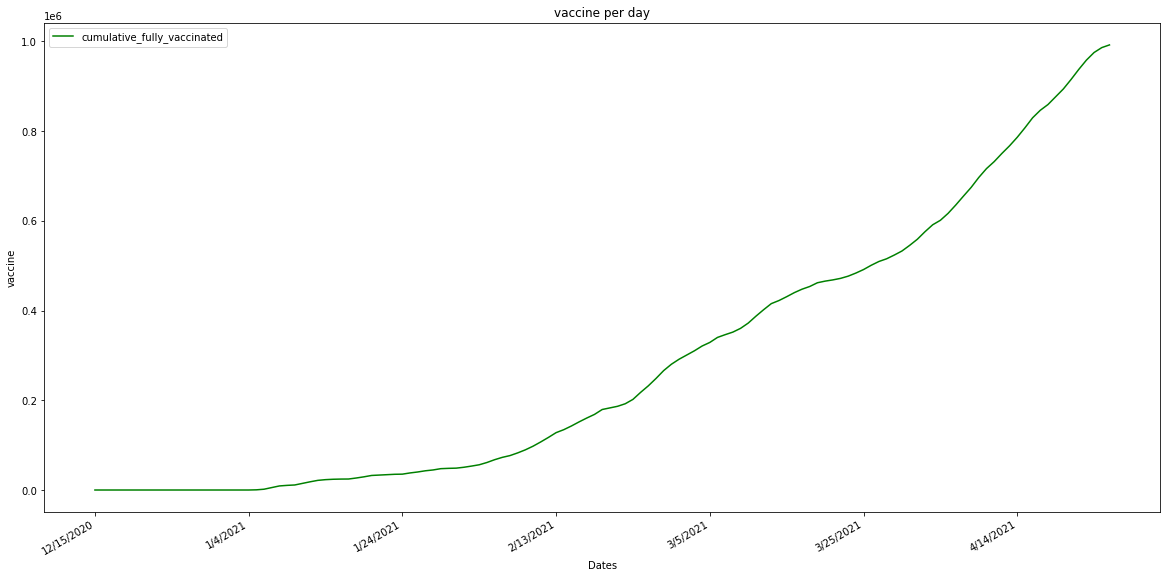

In [157]:
vaccine_plot = ca_counties_vaccine_df.plot('administered_date', 
                                           'cumulative_fully_vaccinated',
                                           kind="line", color= "green", figsize=(20,10))
plt.title("vaccine per day")
plt.xlabel("Dates")
plt.ylabel("vaccine")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

